In [40]:
# This lets us refresh changes from other .py files without having to restart the notebook
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import torch
from torch import nn
import torchvision as tv
import torchvision.transforms.v2 as v2

from blocks import *
from models import *
from utils import validateModelIO, getNormalizedTransform

from trainableModel import TrainingParameters, TrainableModel

from dataLoading import CIFAR10Dataset
from transforms import *


import os

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


In [42]:
model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            
            *[DoubleEncodeBottleneckBlock(in_channels=128, encode_factor1=4, encode_factor2=4) for _ in range(12)],
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),

            nn.Linear(in_features=512, out_features=256),
            nn.LayerNorm(normalized_shape=256),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            
            nn.Linear(in_features=256, out_features=64),
            nn.LayerNorm(normalized_shape=64),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            
            nn.Linear(in_features=64, out_features=10),
    )

validateModelIO(ResidualCNN(network=model, printOutsize=False))


Using device: cuda
ResidualCNN(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_ru

tensor([0.4519, 0.4467, 0.4217])
tensor([0.2279, 0.2258, 0.2248])
MAX VALUE: 1.0
MIN VALUE: 0.0


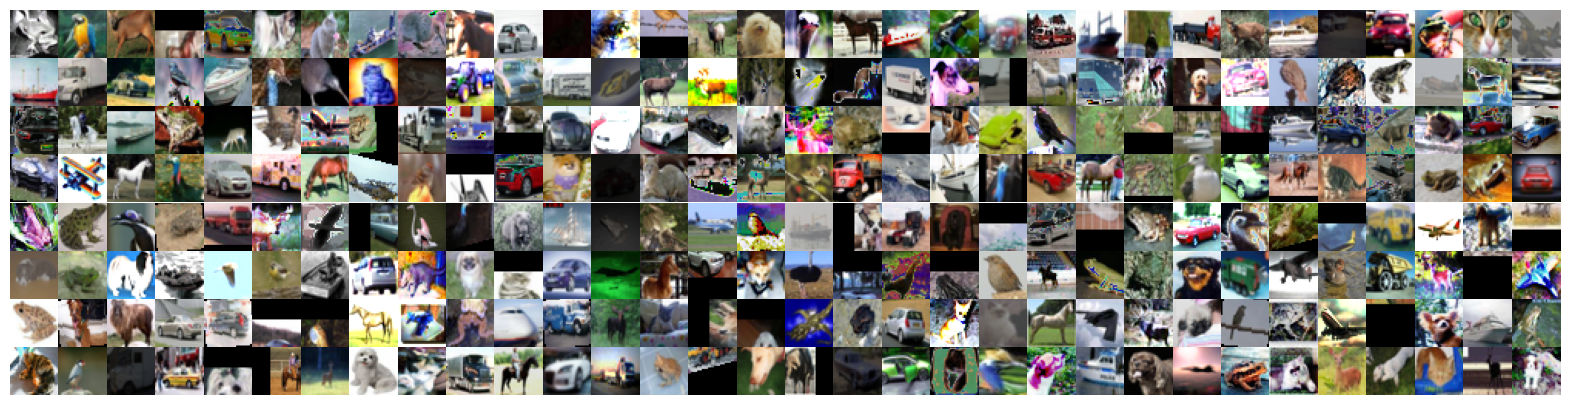

ic| features.size(): torch.Size([256, 3, 32, 32])
ic| labels.size(): torch.Size([256])


frog	bird	deer	horse	automobile	dog	cat	ship	bird	horse	automobile	cat	frog	bird	deer	dog	bird	horse	ship	frog	truck	truck	ship	cat	truck	deer	ship	truck	automobile	frog	cat	airplane	
6	2	4	7	1	5	3	8	2	7	1	3	6	2	4	5	2	7	8	6	9	9	8	3	9	4	8	9	1	6	3	0	

In [50]:
transform = tv.transforms.Compose([
        v2.AutoAugment(v2.AutoAugmentPolicy.CIFAR10),
    ])

fullDataset = CIFAR10Dataset(rootDirectory='cifar-10', csvFilename='trainLabels.csv', dataFolder='train', transform=None)

finalTransform = getNormalizedTransform(fullDataset=fullDataset, customTransforms=transform, showSamples=True)

In [10]:

fullDataset = CIFAR10Dataset(rootDirectory='cifar-10', csvFilename='trainLabels.csv', dataFolder='train', transform=None)

modelParameters = TrainingParameters(fullDataset=fullDataset, trainTransform=finalTransform, valTestTransform=None, 
                                  trainValTestSplit=[0.8, 0.1, 0.1], epochs=10, warmupEpochs=5, batch_size=2048,
                                  lr=1e-2, momentum=0.8)

# PATH = os.path.normpath(r"C:\Users\Nicholas\Documents\GRADUATE OFFLINE\CS 444\CS-444-Final-Project\models\HighwayNetv3-0_Epoch100_Batch2048_LR0.1_Momentum0.8")
# loadedModel = torch.load(PATH)

# model = highwaynetv3
# model.load_state_dict(loadedModel)

trainableModel = TrainableModel('ZTestnet', model, modelParameters)
trainableModel.train()

  0%|          | 0/10 [00:00<?, ?it/s]

 lr: 0.000000, trainLoss: 2.3026, trainAccuracy: 0.1051, validationLoss: 2.3026, validationAccuracy: 0.1129:   0%|          | 0/10 [00:34<?, ?it/s]


lr: 0.000000, trainLoss: 2.3026, trainAccuracy: 0.1051, validationLoss: 2.3026, validationAccuracy: 0.1129:  10%|█         | 1/10 [00:53<08:00, 53.39s/it]


KeyboardInterrupt: 